In [11]:
import sklearn as sk
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Part A. Linear Regression From Scratch

Creating dataframes for the targets and features

In [3]:
X = pd.DataFrame(fetch_california_housing()['data'], columns=fetch_california_housing()['feature_names'])
y = pd.DataFrame(fetch_california_housing()['target'], columns=fetch_california_housing()['target_names'])

Reviewing the data

In [4]:
display(X.info())
display(y.info())
print('There are no missings')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


None

There are no missings


In [8]:
display(X.describe())
display(y.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


There are not ouliers


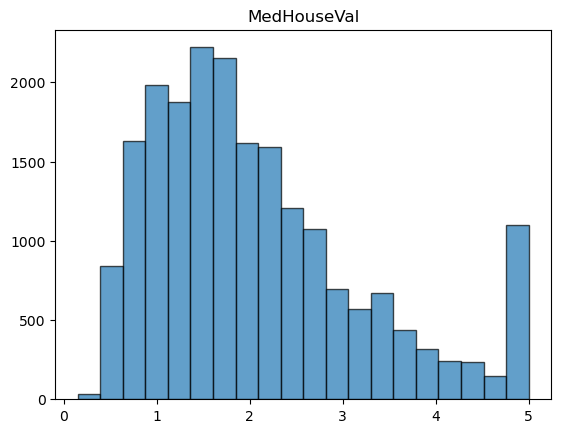

In [5]:
plt.hist(y['MedHouseVal'], bins=20, edgecolor='black', alpha=0.7) 
plt.title('MedHouseVal')
plt.show
print('There are not ouliers')

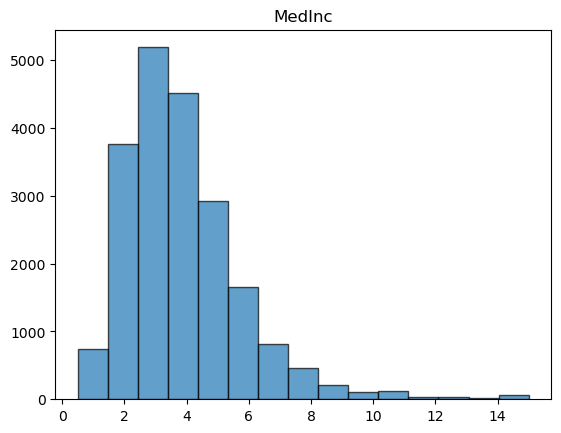

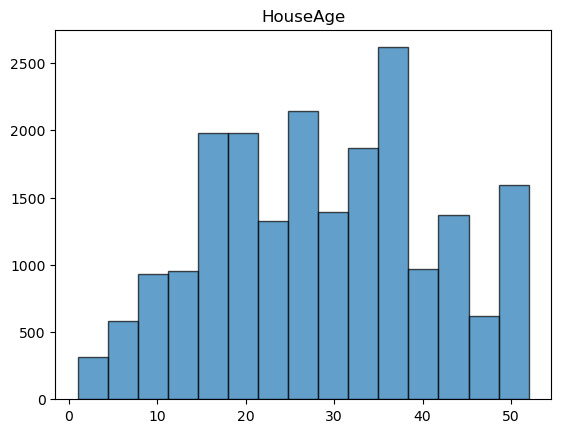

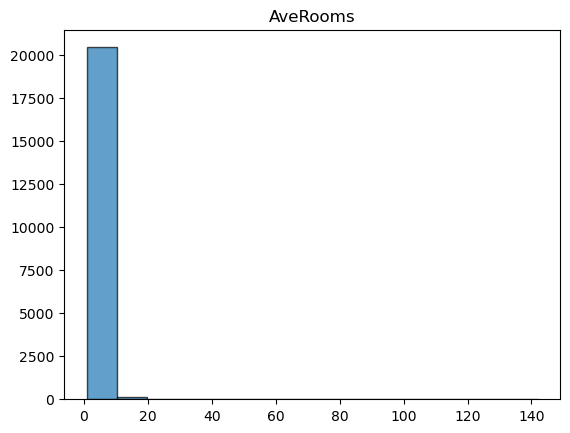

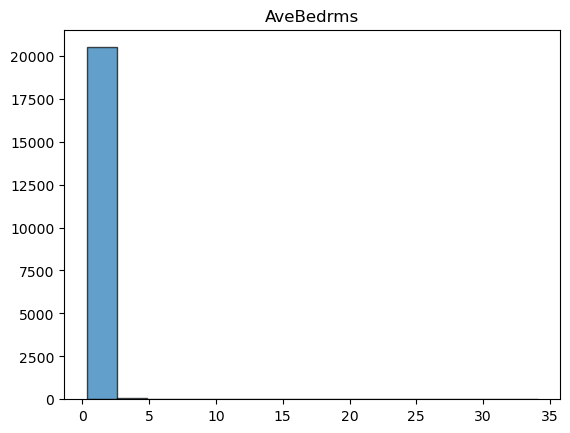

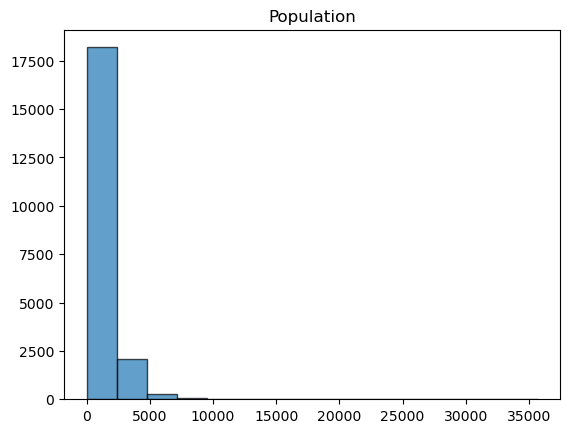

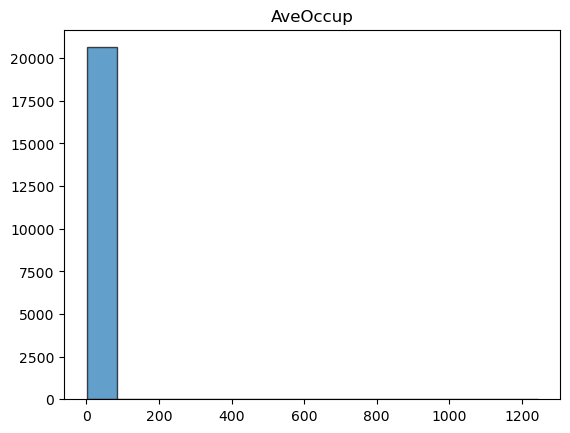

In [ ]:
for target in ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    plt.hist(X[target], bins=15, edgecolor='black', alpha=0.7)
    plt.title(target)
    plt.show()

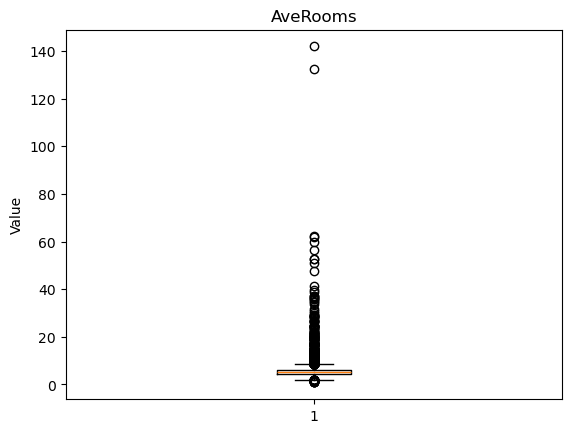

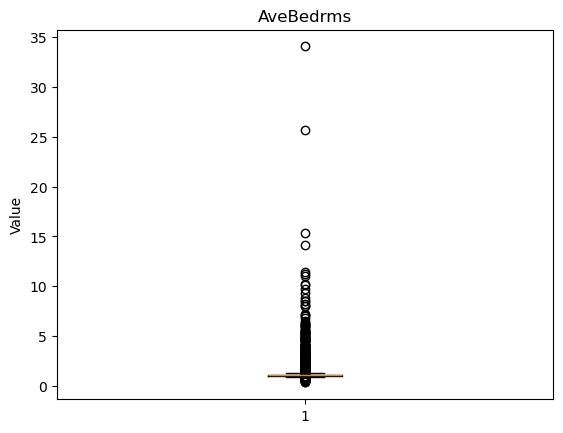

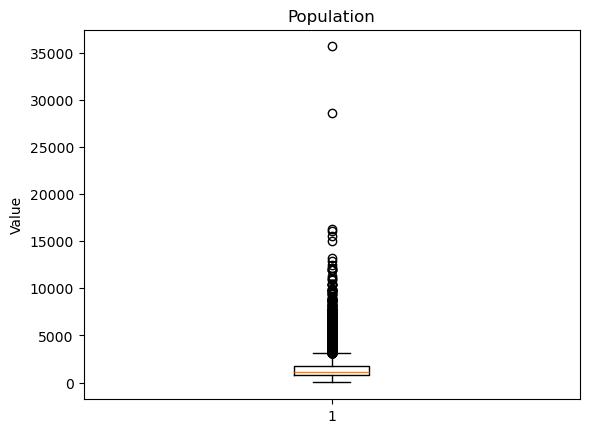

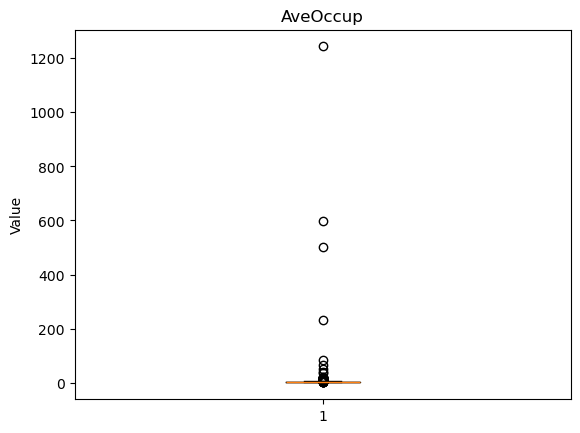

In [ ]:
for target in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    plt.boxplot(X[target])
    plt.title(target)
    plt.show()

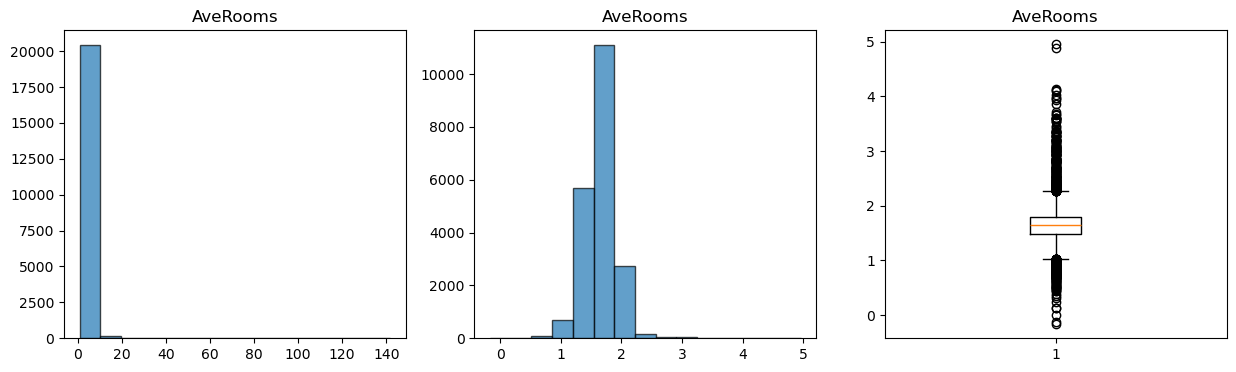

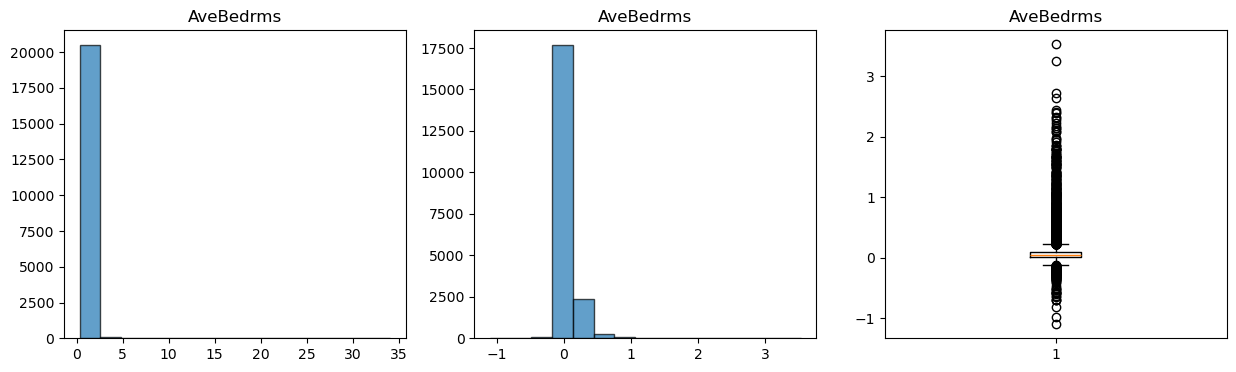

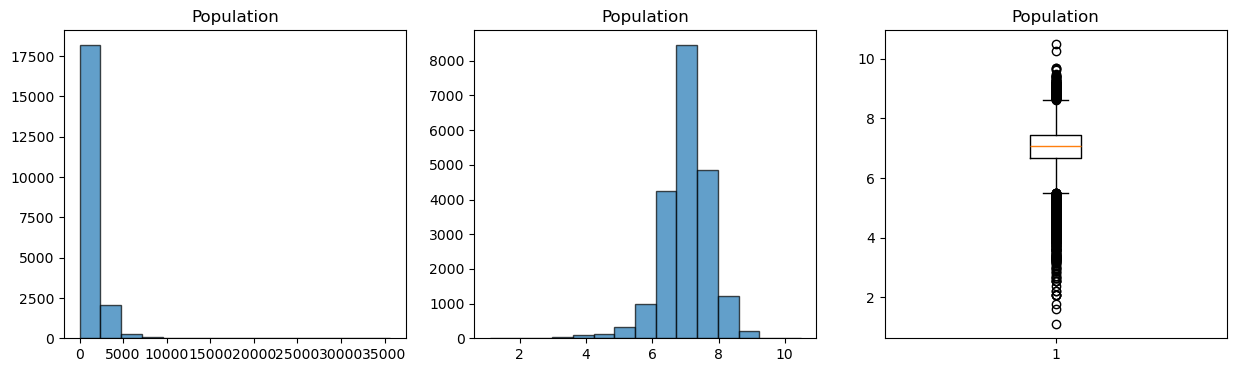

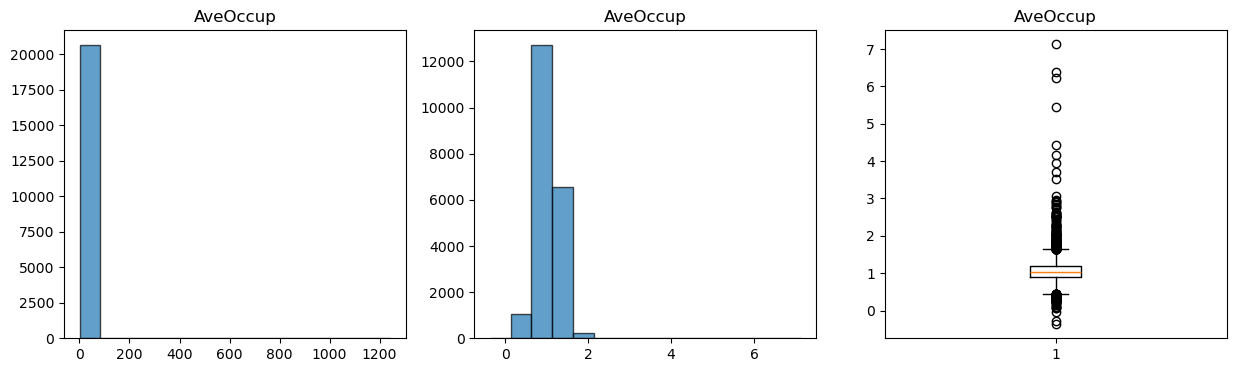

In [17]:
for target in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    fig, axs = plt.subplots(1, 3, figsize=(15, 4)) 
    axs[0].hist(X[target], bins=15, edgecolor='black', alpha=0.7)
    axs[0].set_title(target)
    axs[1].hist(np.log(X[target]), bins=15, edgecolor='black', alpha=0.7)
    axs[1].set_title(target)
    axs[2].boxplot(np.log(X[target]))
    axs[2].set_title(target)
    plt.show()

In [27]:
#['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
#    fig, axs = plt.subplots(1, 3, figsize=(15, 4)) 
#    axs[0].hist(X[target],

q1 = np.percentile(np.log(X['AveRooms']), 25)
q3 = np.percentile(np.log(X['AveRooms']), 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

X[(np.log(X['AveRooms'])<upper_bound) & (np.log(X['AveRooms'])>lower_bound)]

1.026361583658725 2.2649058345599413


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [28]:
q1 = np.percentile(X['AveRooms'], 25)
q3 = np.percentile(X['AveRooms'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

X[(X['AveRooms']<upper_bound) & (X['AveRooms']>lower_bound)]

2.023219161170969 8.469878027106942


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Spliting the dataset in train and test data

In [6]:
fetch_california_housing()['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [9]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
fetch_california_housing()['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [13]:
fetch_california_housing()['target_names']

['MedHouseVal']